# Toxic Comment Classification Challenge

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge



In [0]:
import pandas as pd
import io
import requests
import numpy as np

# url datos en repositorio del proyecto
url_train = "https://github.com/czammar/MA_finalproject/blob/master/data/train.csv?raw=true"
url_test = "https://raw.githubusercontent.com/czammar/MA_finalproject/master/data/test.csv?raw=true"
url_test_labels = "https://github.com/czammar/MA_finalproject/blob/master/data/test_labels.csv?raw=true"

# Leemolos los datos de train, test y labels del test desde nuestro repositorio usando requesto con io
rtrain=requests.get(url_train).content
rtest=requests.get(url_test).content
rtest_labels=requests.get(url_test_labels).content

# Cargamos io hacia pandas
train = pd.read_csv(io.StringIO(rtrain.decode('utf-8')))
test = pd.read_csv(io.StringIO(rtest.decode('utf-8')))
test_labels = pd.read_csv(io.StringIO(rtest_labels.decode('utf-8')))

In [0]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [0]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [0]:
test_labels

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


**Funciones de limpieza**


In [0]:
# Natural language toolkit, nos ayudara con preprocessing de los datos
import re
import nltk
nltk.download('stopwords')

# Carga un set de stopwords predefinidas
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Funcion para ayudarnos a sustituir abreviaciones

def decontracted(phrase):
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase


In [0]:
# Set adicional de stopwords, removeremos palabras tanto de este set como del que
# viene definido en el nltk
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [0]:
# Función auxiliar para remover stopwords y otras normalizaciones de texto
def remove_stopwords(dataframe):
  SYNS = []
  for sentance in dataframe:
    sentance = re.sub('\\n', ' ', sentance)
    sentance = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'', sentance)
    sentance = re.sub("\[\[User.*",'',sentance)
    sentance = re.sub("(http://.*?\s)|(http://.*)",'',sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in STOPWORDS)
    SYNS.append(sentance.strip())
  return SYNS

In [0]:
# Remueve stopwords
synops_train = remove_stopwords(train['comment_text'])

In [0]:
synops_train[:5]

['Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since I am retired now',
 'D aww He matches this background colour I am seemingly stuck with Thanks talk January UTC',
 'Hey man I am really not trying to edit war It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info',
 'More I can not make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know 

In [0]:
train['clean_text'] = synops_train

In [0]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I am really not trying to edit war It ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can not make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember wh...
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,And for the second time of asking when your vi...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,You should be ashamed of yourself That is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,Spitzer Umm theres no actual article for prost...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,And it looks like it was actually you who put ...


**Conteos de comentarios**

In [0]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS

sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

In [0]:
x0=train.iloc[:,2:].sum()

In [0]:
x0

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

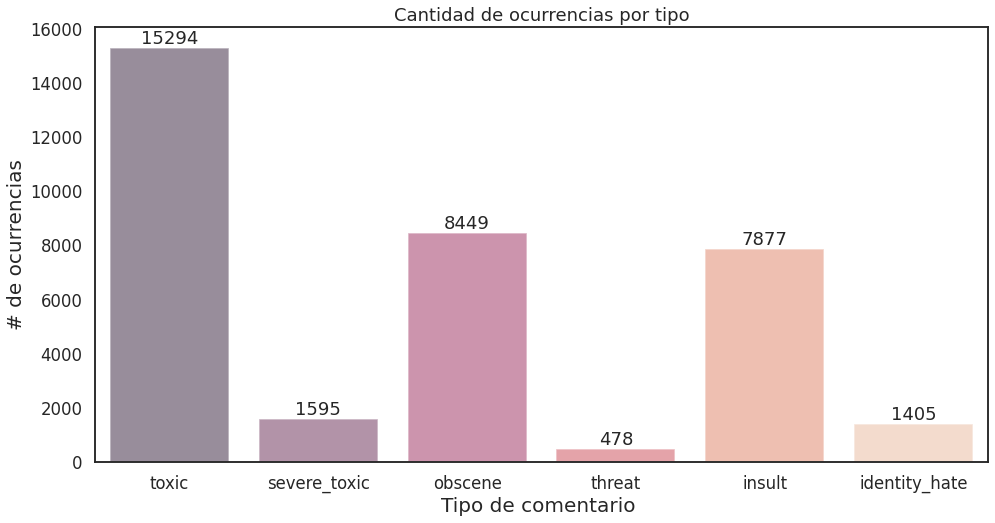

In [0]:
#plot
plt.figure(figsize=(16,8))
ax= sns.barplot(x0.index, x0.values, alpha=0.5, palette="rocket")

plt.title("Cantidad de ocurrencias por tipo")
plt.ylabel('# de ocurrencias', fontsize=20)
plt.xlabel('Tipo de comentario ', fontsize=20)

#loop para agregar eqtiuetas
rects = ax.patches
labels = x0.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Ahora añadimos los que no pertenecen a esas categorias:



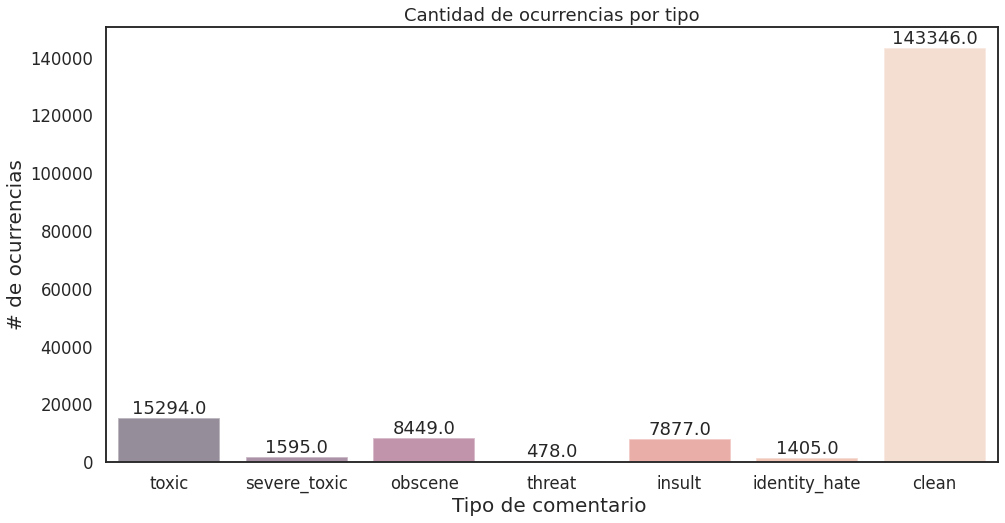

In [0]:
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
x=train.iloc[:,2:].sum()

#plot
plt.figure(figsize=(16,8))
ax= sns.barplot(x.index, x.values, alpha=0.5, palette="rocket")

plt.title("Cantidad de ocurrencias por tipo")
plt.ylabel('# de ocurrencias', fontsize=20)
plt.xlabel('Tipo de comentario ', fontsize=20)

#loop para agregar eqtiuetas
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
ax.invert_xaxis

plt.show()

In [0]:
len(train)-143446

16125

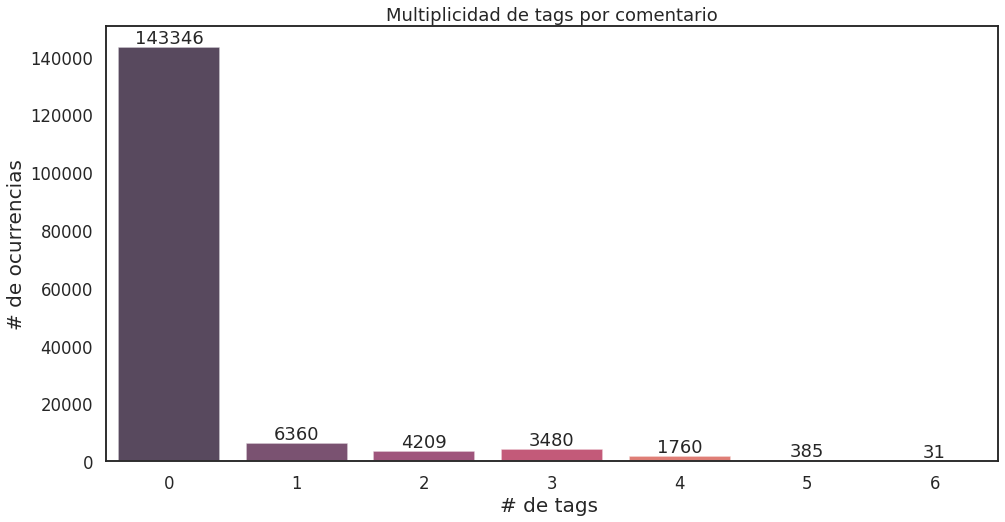

In [0]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8,palette="rocket")
plt.title("Multiplicidad de tags por comentario")
plt.ylabel('# de ocurrencias', fontsize=20)
plt.xlabel('# de tags ', fontsize=20)

#loop para agregar labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**Tablas de contingencia**

In [0]:
temp_df=train.iloc[:,2:-1]

In [25]:
temp_df

,toxic,severe_toxic,obscene,threat,insult
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
159566,0,0,0,0,0
159567,0,0,0,0,0
159568,0,0,0,0,0
159569,0,0,0,0,0


In [26]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)
out

severe_toxic       obscene        threat       insult      
severe_toxic            0     1       0     1       0    1       0     1
toxic                                                                   
0                  144277     0  143754   523  144248   29  143744   533
1                   13699  1595    7368  7926   14845  449    7950  7344

In [28]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)
out

severe_toxic       obscene        threat       insult      
severe_toxic            0     1       0     1       0    1       0     1
toxic                                                                   
0                  144277     0  143754   523  144248   29  143744   533
1                   13699  1595    7368  7926   14845  449    7950  7344

In [39]:
main_col="toxic"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['severe_toxic', 'obscene', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

severe_toxic       obscene        threat       insult      
severe_toxic            0     1       0     1       0    1       0     1
toxic                                                                   
0                  144277     0  143754   523  144248   29  143744   533
1                   13699  1595    7368  7926   14845  449    7950  7344

In [29]:
temp_df.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [40]:
main_col="severe_toxic"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'obscene', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic        obscene        threat       insult      
toxic              0      1       0     1       0    1       0     1
severe_toxic                                                        
0             144277  13699  151044  6932  157610  366  151470  6506
1                  0   1595      78  1517    1483  112     224  1371

In [41]:
main_col="obscene"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic       severe_toxic        threat       insult      
toxic         0     1            0     1       0    1       0     1
obscene                                                            
0        143754  7368       151044    78  150945  177  149400  1722
1           523  7926         6932  1517    8148  301    2294  6155

In [42]:
main_col="threat"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'obscene','insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic        severe_toxic       obscene        insult      
toxic        0      1            0     1       0     1       0     1
threat                                                              
0       144248  14845       157610  1483  150945  8148  151523  7570
1           29    449          366   112     177   301     171   307

In [43]:
main_col="insult"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'obscene', 'threat']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic       severe_toxic       obscene        threat     
toxic        0     1            0     1       0     1       0    1
insult                                                            
0       143744  7950       151470   224  149400  2294  151523  171
1          533  7344         6506  1371    1722  6155    7570  307

**Conteos de palabras en cada clase**

In [0]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
import time
import numpy as np


In [0]:
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [0]:
start_unigrams=time.time()

clean_corpus=synops_train

tfv = TfidfVectorizer(min_df=200,  max_features=10000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,1),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names())

train_unigrams =  tfv.transform(clean_corpus)
#test_unigrams = tfv.transform(clean_corpus.iloc[train.shape[0]:])

tfidf_top_n_per_lass=top_feats_by_class(train_unigrams,features)

end_unigrams=time.time()

print("total time in unigrams",end_unigrams-start_unigrams)
print("total time till unigrams",end_unigrams-start_time)

NameError: ignored

In [0]:
tfidf = TfidfVectorizer(stop_words='english')

In [0]:
corpus = synops_train[:100]

In [0]:
list(synops_train[:4])

['Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since I am retired now',
 'D aww He matches this background colour I am seemingly stuck with Thanks talk January UTC',
 'Hey man I am really not trying to edit war It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info',
 'More I can not make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know 

In [0]:
# https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf#how-to-run-it-in-python-3

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(corpus)

In [0]:
transformed_documents_as_array = transformed_documents.toarray()
# use this line of code to verify that the numpy array represents the same number of documents that we have in the file list
len(transformed_documents_as_array)

100

In [0]:
transformed_documents_as_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 4.51650823, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df


In [0]:
vectorizer.get_feature_names()

['abc',
 'able',
 'abn',
 'about',
 'above',
 'absence',
 'absolute',
 'absolutely',
 'absoutely',
 'absurd',
 'abt',
 'abusing',
 'academic',
 'academics',
 'accepted',
 'access',
 'accidents',
 'according',
 'account',
 'acctually',
 'accurate',
 'accusations',
 'accused',
 'achievable',
 'achieve',
 'acknowledged',
 'across',
 'activity',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'admin',
 'administrative',
 'administrators',
 'after',
 'again',
 'against',
 'age',
 'aggravate',
 'ago',
 'agree',
 'agrees',
 'agriculture',
 'ahead',
 'air',
 'aircracft',
 'airplane',
 'alien',
 'alignment',
 'all',
 'allegedly',
 'allow',
 'almighty',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alternate',
 'alternatives',
 'although',
 'altitu',
 'always',
 'am',
 'amaze',
 'ambiguous',
 'american',
 'ammended',
 'amro',
 'an',
 'ancestry',
 'and',
 'andy',
 'anecdote',
 'animal',
 'another',
 'answer',
 'answering',
 'anti',
 'an

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in synops_train)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)

There are 38896519 words in the combination of all review.


In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(synops_train)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

TypeError: ignored